Enter your Codeforces Handle: OptimalKnight
Handle's Average Ranking is:5239.942307692308 
Handle's Standard Devitation is:2686.1899484175146


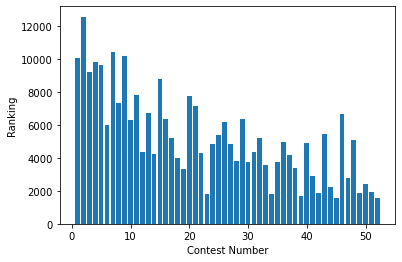

Handle's Average Rating Change is:29.557692307692307
Handle's Standard Devitation is:80.31701933385325


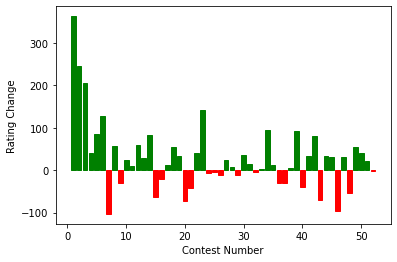

In [22]:
import requests as rq
import matplotlib.pyplot as plt
import statistics
a=input("Enter your Codeforces Handle: ")
res1=rq.get("https://codeforces.com/api/user.rating?handle={}".format(a))
temp= res1.json()['result']
ratings=[]
change=[]
for i in temp:
    ratings.append( i['rank'])
    change.append( i['newRating']-i['oldRating'])
x=[]
for i in range( len(temp)):
    x.append(i+1)
plt.bar(x,ratings)
print("Handle's Average Ranking is:{} ".format( statistics.mean(ratings)))
print("Handle's Standard Devitation is:{}".format( statistics.pstdev(ratings)))
plt.xlabel("Contest Number")
plt.ylabel("Ranking")
plt.show()

barlist=plt.bar(x,change)
for i in range(len(x)):
    if( change[i]>0):
        barlist[i].set_color('g')
    elif( change[i]<0):
        barlist[i].set_color('r')
    else:
        barlist[i].set_color('b')
print("Handle's Average Rating Change is:{}".format( statistics.mean(change)))
print("Handle's Standard Devitation is:{}".format( statistics.pstdev(change)))
plt.xlabel("Contest Number")
plt.ylabel("Rating Change")
plt.show()

Enter Codeforces Contest Number: 1581
The net rating change of Codeforces community is: 519754


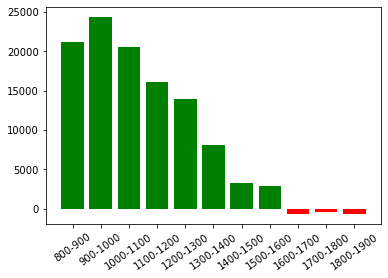

In [40]:
import requests as rq
import matplotlib.pyplot as plt
import statistics
import math
a=input("Enter Codeforces Contest Number: ")
res1=rq.get("https://codeforces.com/api/contest.ratingChanges?contestId={}".format(a))
temp=res1.json()['result']
sum=0

interval_rating_change={ "0-800":0 }
x=800
y=900
for i in range(0,28):
    a=str(x)+"-"+str(y)
    interval_rating_change[a]=0
    x=y
    y+=100
for i in temp:
    change=i['newRating']-i['oldRating']
    lower=math.floor(i['oldRating']/100)
    if( lower<8):
        interval_rating_change['0-800']+=change
    else:
        interval_rating_change[ str(lower*100)+'-'+str( (lower+1)*100)]+=change
    sum+=change 
print("The net rating change of Codeforces community is:",sum)
del interval_rating_change['0-800'];
for i in list(interval_rating_change):
    if( interval_rating_change[i]==0):
        del interval_rating_change[i]
color_bars=[]
for i in interval_rating_change:
    if( interval_rating_change[i]>0):
        color_bars.append('green')
    elif( interval_rating_change[i]<0):
        color_bars.append('red')
    else:
        color_bars.append('blue')
bar_graph=plt.bar( range(len(interval_rating_change)) ,list(interval_rating_change.values()),tick_label=list(interval_rating_change.keys()),color=color_bars )
plt.xticks(rotation=35)
plt.show()
